# HARSH PARIKH


## LINEAR REGRESSION WITH TWO VARIABLES
In this task, we will perform linear regression on a dataset containing the number of hours a student studies for (independent variable) and the marks that particular student scores (dependent variable). This will help us predict the marks a student is expected to score based on the number of hours he/she studies for.

### LIBRARIES USED
#### scikit-learn:
This will help us train and test the model, devise the regressor and thus use our dataset to create a prediction model using linear regression. It'll also help us measure the accuracy of our model.
#### pandas:
This library will help us in the handling and manipulation of our dataset.
#### matlpotlib:
This library will help us visualize, hence, better understand our data.

Step 1: Let's import all the modules and functions that we'll be needing.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
%matplotlib inline

Step 2: Import the study dataset which is a comma separated file and convert it into a pandas dataframe. Get familiar with the data and check it's integrity.

In [2]:
url = 'http://bit.ly/w-data'
study_data = pd.read_csv(url)
print(study_data.head())
print('Number of null values in each column:')
print(study_data.isnull().sum())
print(study_data.shape)

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
Number of null values in each column:
Hours     0
Scores    0
dtype: int64
(25, 2)


Step 3: Let's visualize our data to understand the correlation between hours studied per day (X) and marks obtained (Y).

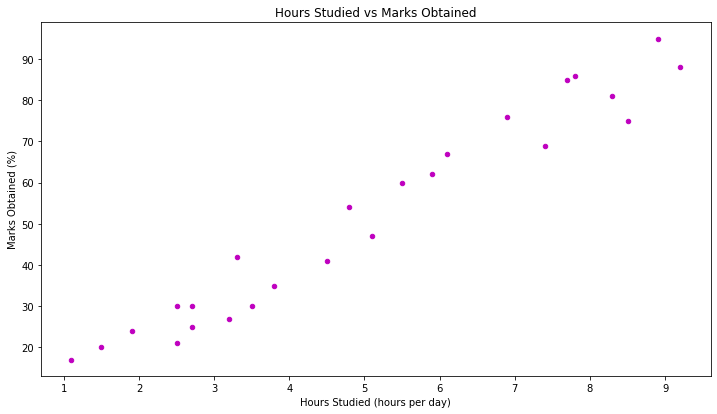

In [3]:
study_data.plot(kind='scatter',x='Hours',y='Scores',figsize=(12,6.5),color='m')
plt.title('Hours Studied vs Marks Obtained')
plt.xlabel('Hours Studied (hours per day)')
plt.ylabel('Marks Obtained (%)')
plt.show()

Step 4(optional): Get a feel of the correlation, these scores indicate a strong correlation!

In [4]:
print(study_data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


Step 5: Let's get the our X and Y values ready in the form of matrices. The x matrix is reshaped so that proper matrix multiplication can take place.

In [5]:
x = study_data.iloc[:,0].values
y = study_data.iloc[:,1].values
x = x.reshape(-1,1)
print(f"{x}\n{y}")

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Step 6: With the help of sklearn functions we can split our data into training and testing data. We also create the regressor which calculates the slope and y-intercept of the line.

In [6]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2,random_state=2)
regressor = LinearRegression()
regressor.fit(train_x,train_y)
print('Slope = ',regressor.coef_)
print('Y-intercept = ',regressor.intercept_)
Y = regressor.coef_*train_x + regressor.intercept_

Slope =  [9.94061514]
Y-intercept =  1.5079104828268655


###### Y = 9.94x + 1.5

Step 7: Let's visualize how the line looks compared to the data points.

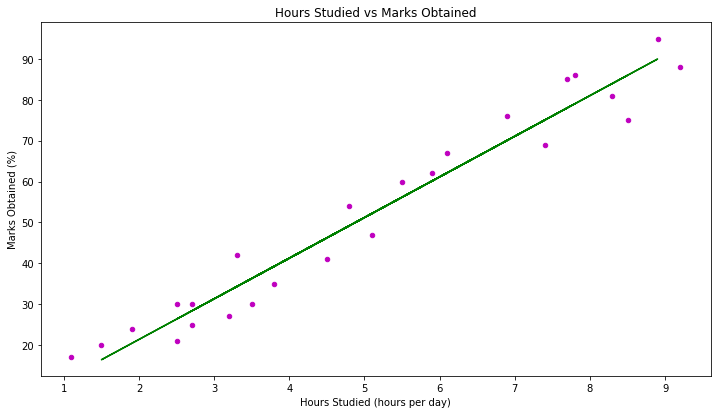

In [7]:
study_data.plot(kind='scatter',x='Hours',y='Scores',figsize=(12,6.5),color='m')
plt.plot(train_x,Y,color='g')
plt.title('Hours Studied vs Marks Obtained')
plt.xlabel('Hours Studied (hours per day)')
plt.ylabel('Marks Obtained (%)')
plt.show()

Step 8: Create the predicted output values for the test data. Also evaluate the accuracy of the model with the help of mean absolute error and an R2 score. Lower the MAE and closer the R2 score to 1, better the model.

In [8]:
predicted_y = regressor.predict(test_x) 
mean_abs_err = metrics.mean_absolute_error(predicted_y,test_y)
r2 = r2_score(predicted_y,test_y)
print(f"Mean Absolute Error : {round(mean_abs_err,2)}")
print(f"R2 Score : {round(r2,2)}/1.0")

Mean Absolute Error : 4.88
R2 Score : 0.98/1.0


Step 9: Lets see how close are our model's predicted values as compared to the actual values.

   Actual Marks  Predicted Marks
0            17        12.442587
1            21        26.359448
2            24        20.395079
3            88        92.961570
4            76        70.098155


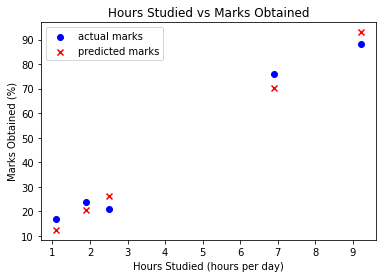

In [9]:
comparison = pd.DataFrame({'Actual Marks': test_y,'Predicted Marks': predicted_y})
print(comparison)
plt.scatter(x=test_x,y=test_y,c='b',marker='o',label='actual marks')
plt.scatter(x=test_x,y=predicted_y,c='r',marker='x',label='predicted marks')
plt.title('Hours Studied vs Marks Obtained')
plt.xlabel('Hours Studied (hours per day)')
plt.ylabel('Marks Obtained (%)')
plt.legend()
plt.show()

Step 10: For a sample input

Number of hours studied per day : 9.25
Predicted marks as per the regression model : 93.46


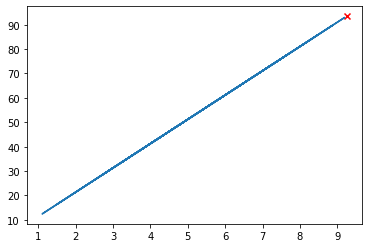

In [10]:
no_of_hours = 9.25
predicted_marks =regressor.predict([[no_of_hours]])
print(f"Number of hours studied per day : {no_of_hours}")
print(f"Predicted marks as per the regression model : {round(predicted_marks[0],2)}")
plt.plot(x,regressor.coef_*x + regressor.intercept_)
plt.scatter(no_of_hours,predicted_marks,marker='x',color='r')
plt.show()